In [2]:
!pip install -r requirements.txt

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## Задание 1

В папке находится изображение `railway.jpeg` с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

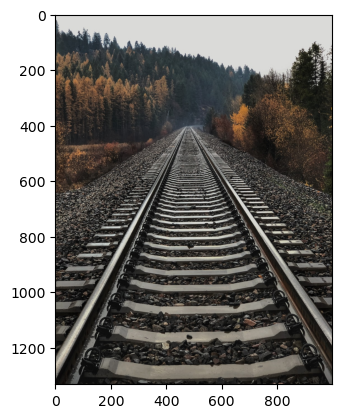

In [6]:
image = cv.imread("images/railway.jpeg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

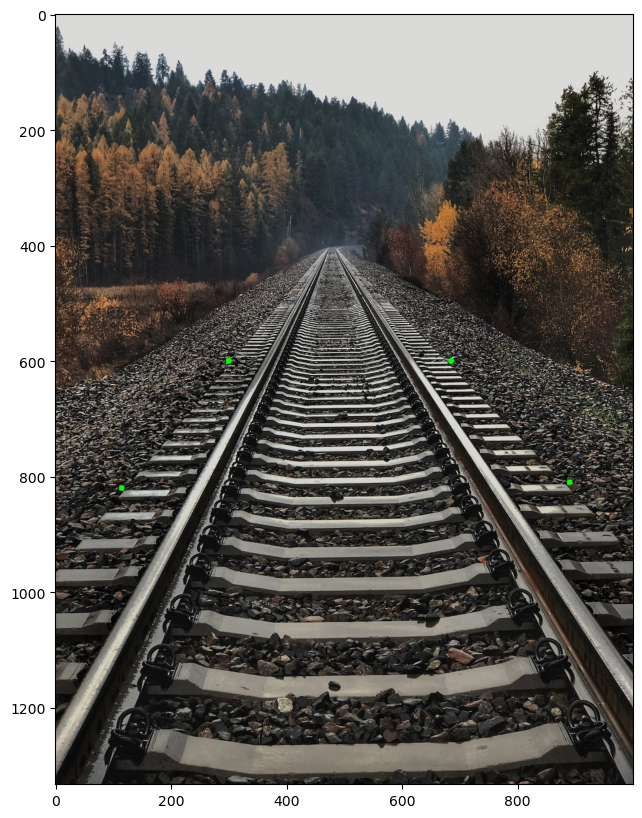

In [30]:
# отметим ключевые точки
height, width = image.shape[:2]

points = [
    [300, 600],
    [685, 600],
    [115, 820],
    [890, 810],
]

image_copy = image.copy()

for p in points:
    cv.circle(image_copy, center=p, radius=5, color=(0, 255, 0), thickness=-1) 

    
fig = plt.figure(figsize=(15, 10))
plt.imshow(image_copy)
plt.show()

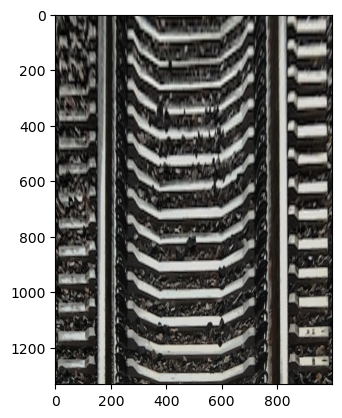

In [31]:
corners = [[0, 0], [width, 0], [0, height], [width, height]]
warp_matrix = cv.getPerspectiveTransform(np.float32(points), np.float32(corners))
transformed = cv.warpPerspective(image, warp_matrix, (width, height))

plt.imshow(transformed)
plt.show()

## Задание 2

В папке находится изображение `palm.png` с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении `palm_result.png`

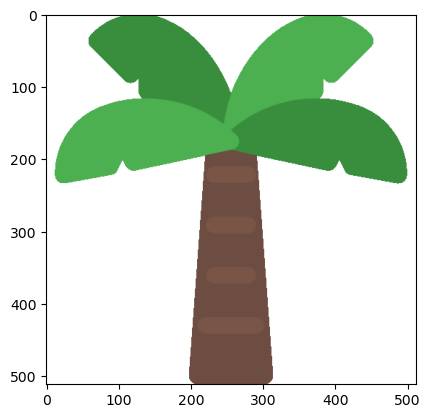

In [73]:
image = cv.imread("images/palm.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

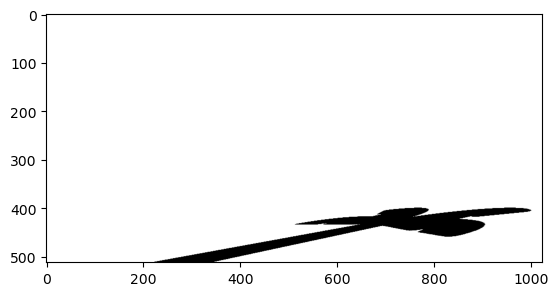

In [75]:
black_palm = cv.threshold(image, thresh=200, maxval=255, type=cv.THRESH_BINARY)[1]
height, width = black_palm.shape[:2]

# Points for perspective transform
points_init = np.float32([[0, 0], [height, 0], [0, width], [height, width]])
points = np.float32([
    [700,  400], 
    [1100, 400],
    [180,  490], 
    [300,  600]]
)

M = cv.getPerspectiveTransform(np.float32(points_init), np.float32(points))
shadow = cv.warpPerspective(black_palm, M, (width * 2, height), borderValue=(255, 255, 255))
plt.imshow(shadow)
plt.show()

In [76]:
def remove_background(image):
    cp = image.copy()
    cp_alpha = cv.cvtColor(cp, cv.COLOR_RGB2RGBA)
    alpha_mask = cv.threshold(image, thresh=200, maxval=255, type=cv.THRESH_BINARY_INV)[1]
    cp_alpha[..., 3] = alpha_mask[..., 0]
    return cp_alpha

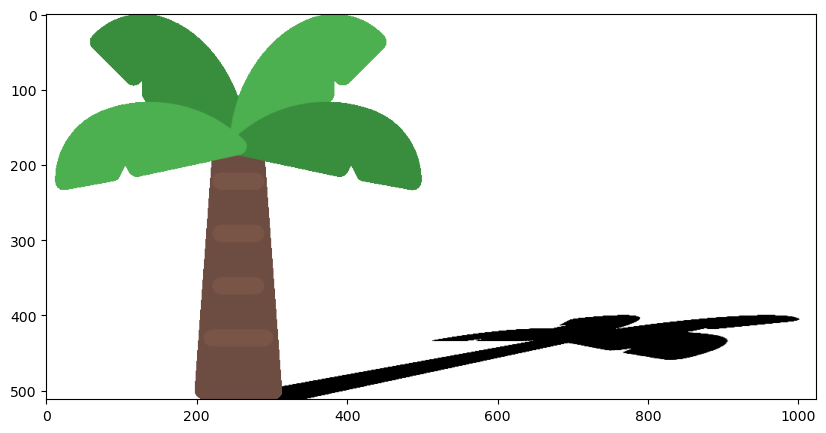

In [77]:
plt.figure(figsize=(10, 5))
plt.imshow(shadow)
plt.imshow(remove_background(image))

plt.xlim(0, shadow.shape[1])
plt.show()